In [1]:
## 📥 1. Import Libraries and Create Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [5]:
# Create synthetic Titanic-like dataset
np.random.seed(42)
n_samples = 200

In [6]:
age = np.random.randint(18, 70, n_samples)
fare = np.random.randint(50, 600, n_samples)
gender = np.random.choice(['Male', 'Female'], n_samples)
survived = (0.4 * (fare > 300) + 0.3 * (gender == 'Female') + np.random.randn(n_samples) * 0.1 > 0.5).astype(int)


In [7]:
df = pd.DataFrame({'Age': age, 'Fare': fare, 'Gender': gender, 'Survived': survived})
df.head()

,Age,Fare,Gender,Survived
0,56,505,Male,0
1,69,460,Female,1
2,46,367,Male,0
3,32,274,Male,0
4,60,283,Female,0


In [8]:
## 🧹 2. Preprocessing (Encoding + Splitting)

In [9]:
# Encode gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0

In [10]:
# Split data
X = df[['Age', 'Fare', 'Gender']]
y = df['Survived']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
## ⚙️ 3. Model Training and Prediction

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [14]:
## 📊 4. Model Evaluation

In [15]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [16]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.88
Precision: 0.70
Recall: 0.70
F1 Score: 0.70


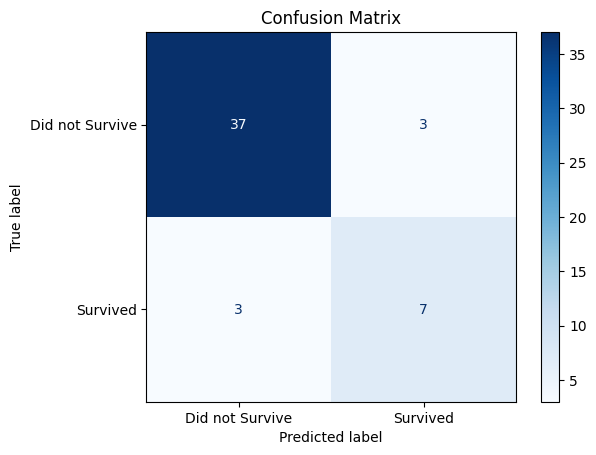

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not Survive', 'Survived'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [18]:
## 📈 5. Visualizing Predictions

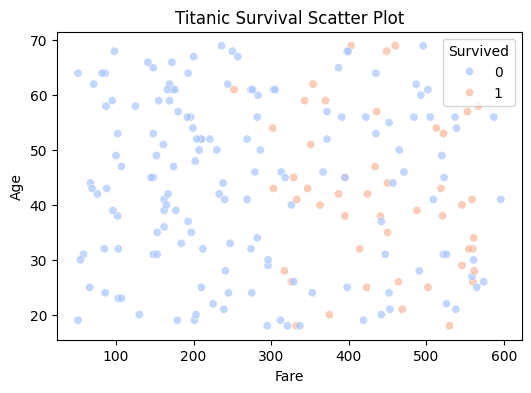

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=df, palette='coolwarm', alpha=0.7)
plt.title('Titanic Survival Scatter Plot')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()